# Ecuaciones Diferenciales Parciales (PDEs)

## Ecuaciones diferenciales parciales parabólicas

Recordemos la condición para una ecuación diferencial parabólica con dos variables independientes
$$ 
\alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta \frac{\partial\phi}{\partial x} + \varepsilon\frac{\partial\phi}{\partial y} = f.
$$
La condición para que esta PDE sea parabólica es que 
$$
\Delta = 0
$$
con $\Delta = \beta^2 - 4\alpha\gamma$.

Un caso particular de PDE parabólica es la ecuación de difusión, la cual vamos a estudiar en el contexto de la ecuación de difusión de calor. En una dimension, la ecuación toma la forma
$$
\frac{\partial T}{\partial t} = \kappa\frac{\partial^2 T}{\partial x^2},
$$
donde $\kappa$ se conoce como la *difusividad térmica*. La ecuación dicta la dinámica de un perfil de temperatura en sistemas que están inicialmente fuera de equilibrio térmico y como se alcanza el estado de equilibrio en caso de que este estado exista.

En este caso, indentificamos
$$
x\to x,\quad y\to t,\quad \alpha \to \kappa,\quad \varepsilon \to - 1,\quad \beta, \gamma, \delta, f \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = 0,
$$
de manera tal que la ecuación es en efecto parabólica.

Sin embargo, en este caso, es importante recalcar que la ecuación es **dinámica**. La dependencia temporal implica que ahora consideramos un **problema de condición inicial**, en el cual tenemos una condición inicial y deseamos predecir el comportamiento de una función conforme pasa el tiempo.

* La ecuación diferencial para el campo escalar $T(x, t)$, en este caso particular, depende de dos variables $x$ y $t$. Según los métodos de discretización que aprendimos en la lección anterior con respecto a ecuaciones elípticas, podríamos intentar crear una grilla espacio-temporal en la cual tenemos un espacio de dos dimensiones con cada punto correspondiendo a un punto de espacio y de tiempo
* Sim embargo, para el caso de la variable temporal, **no tenemos una restricción de frontera**. 

## Discretización

Ahora tenemos que considerar dos condiciones:

* Condiciones de frontera:
$$T(x=0, t) = T_0, \quad T(x=L, t) = T_L.$$

* Condiciones iniciales:
$$
T(x, t=0) = T_0 +  (T_L - T_0)\left(\frac{f(x) - f(0)}{f(L) - f(0)}\right)
$$

## El método FTCS explícito (*forward time centred space*, tiempo al frente espacio al medio)

Tomamos los siguentes pasos:

* Paso 1: Discretización en espacio:
$\displaystyle x_m = \frac{m}{M}L = am, \quad m=0,\dots,M, \quad a = \frac{L}M$,

$T_m(t) = \left[T_0(t), \dots{}, T_{M}(t)\right]$

$\displaystyle \left.\frac{\partial^2 T}{\partial x^2}\right|_{x=x_m, t} \approx \frac{T_{m+1} - 2 T_m + T_{m-1}}{a^2}\quad$ (espacio centrado "centred space", CS)

* Paso 2: Discretización temporal:
$\displaystyle \frac{d T_m}{d t} \approx \kappa\frac{T_{m+1} - 2 T_m + T_{m-1}}{a^2},\quad m = 1 \dots{}, M-1$

Sea $t_n = nh$, con $h$ el paso temporal. Con la notación $T_m(t_n) \equiv T_m^n$, tenemos

$\displaystyle \Rightarrow \left.\frac{\partial T}{\partial t}\right|_{x=ma, t=nh} \approx \frac{T_{m}^{n+1} - T_m^n}{h} \equiv \kappa\frac{T_{m+1}^n - 2 T_m^n + T_{m-1}^n}{a^2}$ ("Tiempo al frente", FT).

Con esto:

$\Rightarrow$ **El método FCTS explícito:**
$$
\boxed{T_m^{n+1} = T_m^n + \frac{\kappa h}{a^2}\left(T_{m+1}^n - 2 T_m^n + T_{m-1}^n\right)}.
$$


Nótese que utilizamos el método de Euler para atacar el diferencial temporal.

* Esta puede parecer una decisión extraña dado que conocemos métodos más precisos para la evolución temporal (e.g. Runge-Kutta)
* Sin embargo, la aproximación espacial de la segunda derivada espacial no es muy precisa e introduce un error de segundo orden. De esta forma, no tiene sentido mejorar la aproximación temporal.


### Estabilidad numérica

* El método FCTS es estable para ecuaciones parabólicas, pero **no lo es para ecuaciones hiperbólicas** tales como la ecuación de onda
* Esto se debe a modos de oscilación que introduce la discretización numérica
* Existen formas de mejorar esta estabilidad para ecuaciones hiperbólicas que veremos en la siguiente lección
* Para ecuaciones parabólicas el método FCTS implícito es estable 

# Laboratorio

<div>
<img src="Fig1.png" width="550"/>
</div>

Nuestro objetivo es calcular el perfil de temperatura vertical de la interfase metálica, con $x$ denotando la distancia desde el medio caliente hasta el medio frío. Vamos a calcular este perfil de temperatura como función del tiempo. Vamos a asumir que el perfil de temperatura es igual en toda la sección del fondo del contenedor y que los cambios de temperatura de los medios no cambian apreciablemente.

Utilicemos los siguientes parámetros:
* $T_{\rm{hot}} = 50 C$
* $T_{\rm{cold}} = 0 C$
* La temperatura inicial del contenedor es $T_{\rm{mid}} = 20 C$
* La difusividad térmica es $\kappa = 4.25 \times 10^{-6} m^2 s^{-1}$
* $L = 0.01 m$, el grosor del contenedor
* $M = 100$, el número de puntos de la grilla espacial
* $h = 10^{-4}$, el paso temporal

Complete la siguiente función con el método FTCS y grafique el perfil del temperatura del contenedor en los puntos temporales $t = 0.01, 0.1, 0.4, 10.0$

In [15]:
import numpy as np

# El argumento t_end es el tiempo final, i.e., t = 10.0
def heat_ftcs_explicit(Th, Tc, Tm, kappa, L, M, h, t_end):
    # Creamos el arreglo para contener el perfil de temperatura
    # Note que usamos M + 1
    T = np.zeros(M + 1, dtype = float)
    # Condición de inicial
    T[0] = Th
    T[M] = Tc
    T[1:M] = Tm
    # Arreglo de valores de temperatura
    Tp = np.zeros(M + 1, dtype = float)
    Tp[0] = Th
    Tp[M] = Tc
    # Parámetros
    t = 0.0
    a = L / M
    # Arreglo de resultados t = 0.01, 0.1, 0.4, 10.0
    T_res = np.zeros((M + 1, 4), dtype = float)
    # FTCS
    its = 0
    index = 0
    while t < t_end:
        # Calculamos los valores nuevos de temperatura
        for i in range(1, M):
            # COMPLETE AQUÍ CON FTCS
            Tp[i]=T[i] + ((kappa*h)/(a*a))*(T[i+1]-2*T[i]+T[i-1])
        # Ahora debemos copiar Tp en T y T en Tp
        # COMPLETE AQUÍ
        #T_temp = Tp
        #Tp = T
        #T = T_temp
        T=Tp
        # Incrementamos el tiempo en un paso h
        t += h
        its += 1
        # Si el tiempo es 0.01, 0.1, 0.4 o 10.0; guardamos el resultado en un arreglo
        if its == 100 or its == 1000 or its == 4000 or its == 100000:
            # COMPLETE AQUÍ
            T_res[:, index] = T
            index += 1
            # Guarde el resultado en T_res e incremente index
        
    return T_res, its

In [16]:
# Invoque la función
T, its = heat_ftcs_explicit(50, 0, 20, 4.25*10**(-6), 0.01, 100,
                            10**(-4), 10.0)

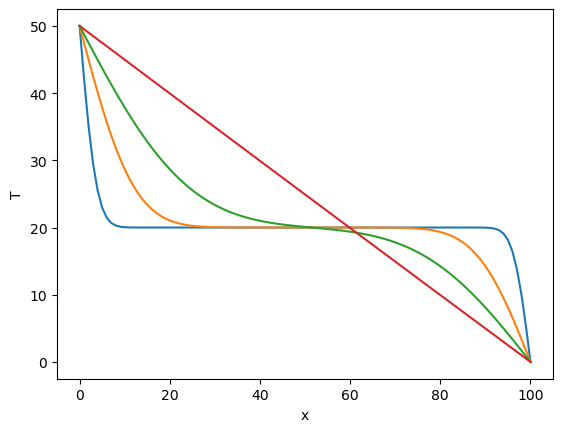

In [17]:
import matplotlib.pyplot as plt

plt.plot(T[:,0])
plt.plot(T[:,1])
plt.plot(T[:,2])
plt.plot(T[:,3])
plt.xlabel('x')
plt.ylabel('T')
plt.show()